Viết chương trình chọn Quản trường Lâm Viên trong ảnh 'dalat.jpg' từ thư mục 'exercise'. Dùng phương pháp Coordinate Mapping bà Binary Closing cho vùng vừa chọn. Lưu vào máy với tên là quan_truong_lam_vien.jpg

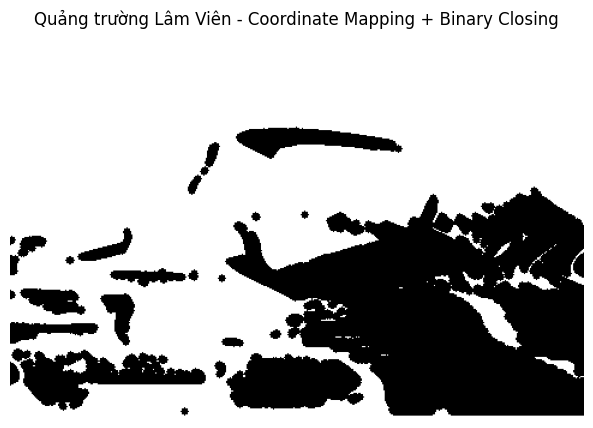

In [2]:
# 1. Import thư viện cần thiết
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_closing, disk
from skimage.color import rgb2gray

# 2. Đọc ảnh chính và template vùng Quảng trường Lâm Viên
img = cv2.imread("exercise/dalat.jpg")
template = cv2.imread("exercise/lamvien_template.jpg")

# Chuyển sang grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
h, w = template_gray.shape

# 3. Template Matching để xác định vùng
result = cv2.matchTemplate(img_gray, template_gray, cv2.TM_CCOEFF_NORMED)
_, _, _, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# 4. Cắt vùng ảnh chứa Quảng trường Lâm Viên
roi = img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

# 5. Áp dụng Coordinate Mapping (biến dạng nhẹ)
def coordinate_mapping(img):
    rows, cols = img.shape[:2]
    map_y, map_x = np.indices((rows, cols), dtype=np.float32)
    map_x = map_x + 10 * np.sin(2 * np.pi * map_y / 60)  # Gợn sóng nhẹ theo chiều ngang
    return cv2.remap(img, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

warped = coordinate_mapping(roi)

# 6. Chuyển sang ảnh nhị phân
gray = rgb2gray(warped)
binary = gray > 0.5  # Ngưỡng cơ bản, có thể điều chỉnh

# 7. Áp dụng Binary Closing để làm đầy lỗ nhỏ và làm mịn
closed = binary_closing(binary, footprint=disk(3))  # dùng kernel hình đĩa

# 8. Chuyển sang ảnh 8-bit để lưu
closed_uint8 = (closed * 255).astype(np.uint8)

# 9. Lưu kết quả
cv2.imwrite("quan_truong_lam_vien.jpg", closed_uint8)

# 10. Hiển thị
plt.figure(figsize=(10, 5))
plt.imshow(closed, cmap='gray')
plt.title("Quảng trường Lâm Viên - Coordinate Mapping + Binary Closing")
plt.axis('off')
plt.show()
